# Portfolio Risk Analysis
# Portfolio Management

In [9]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


# Useful Python code

https://pandas.pydata.org/pandas-docs/stable/10min.html
https://pandas.pydata.org/pandas-docs/stable/visualization.html


#### Import some Packages and Modules

In [10]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm


#  File Contents
Returns to the following asset classes are contained in the file
 * "MSCI WORLD"
 * "MSCI AC WORLD"    
 * "MSCI EUROPE"
 * "MSCI EM"
 * "MSCI EAFE"        
 * "MSCI PACIFIC"
 * "MSCI USA"
 * "Treasury.Bond.10Y"
 * "Treasury.Bill.90D"


 <span style="color:blue">Our set of risky assets for the analysis is  MSCI EUROPE, MSCI USA , MSCI PACIFIC, Treasury.Bond.10Y </span>


In [11]:
#
# read in the data

inpath  = "/Users/jeeinyune/Desktop/"
outpath = "/Users/jeeinyune/Desktop/"

infile  = "ReturnsPortfolios.csv"

print(inpath+infile)
indata = pd.read_csv( inpath + infile)


/Users/jeeinyune/Desktop/ReturnsPortfolios.csv


In [12]:
indata.head(5)

,Date,MSCI WORLD,MSCI AC WORLD,MSCI EUROPE,MSCI EM,MSCI EAFE,MSCI PACIFIC,MSCI USA,Treasury.Bond.10Y,Treasury.Bill.90D,Treasury.Bill.30D
0,1/29/1988,0.024592,0.025330,-0.040626,0.098380,0.018081,0.049747,0.042834,0.044235,0.005001,0.002762
1,2/29/1988,0.058224,0.058079,0.059266,0.003396,0.066914,0.070676,0.041869,0.013917,0.005349,0.004564
2,3/31/1988,0.030382,0.031100,0.027948,0.107385,0.061675,0.078041,-0.033456,-0.019930,0.004803,0.004402
3,4/29/1988,0.012798,0.012980,0.019014,0.053382,0.014717,0.012751,0.009184,-0.012511,0.004554,0.004577
4,5/31/1988,-0.019802,-0.019521,-0.018278,0.029962,-0.031833,-0.038039,0.008603,-0.015848,0.005027,0.005051


In [13]:
RiskyAsset     = ["MSCI EUROPE","MSCI USA","MSCI PACIFIC","Treasury.Bond.10Y"]
RiskFreeAsset  = "Treasury.Bill.90D"

In [14]:
# print out first 3 rows and all columns of risky assets
indata.loc[1:3,RiskyAsset]

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
1,0.059266,0.041869,0.070676,0.013917
2,0.027948,-0.033456,0.078041,-0.019930
3,0.019014,0.009184,0.012751,-0.012511



## <span style="color:black">Part 1: Risky Assets Analysis</span>

 We will calculate the following of the risky assets:
1. mean
2.	median
3.	standard deviations 
4.	skew 
5.	kurtosis
6.  return - risk ratio 
7.  plot the assets classes on a return - risk graph   
8.  Comparing the statistics of the risky assets


#### <span> 1. mean </span>

In [15]:
mean = indata[RiskyAsset].mean()
mean

MSCI EUROPE          0.007798
MSCI USA             0.009155
MSCI PACIFIC         0.003608
Treasury.Bond.10Y    0.005627
dtype: float64

#### <span> 2. median </span>

In [16]:
indata[RiskyAsset].median()

MSCI EUROPE          0.010439
MSCI USA             0.012908
MSCI PACIFIC         0.001994
Treasury.Bond.10Y    0.005221
dtype: float64

#### <span> 3. standard deviation </span>

In [17]:
stdev = indata[RiskyAsset].std()
stdev

MSCI EUROPE          0.049996
MSCI USA             0.041358
MSCI PACIFIC         0.055957
Treasury.Bond.10Y    0.019887
dtype: float64

#### <span> 4. skew </span>

In [18]:
indata[RiskyAsset].skew()

MSCI EUROPE         -0.487418
MSCI USA            -0.565864
MSCI PACIFIC         0.003849
Treasury.Bond.10Y   -0.009944
dtype: float64

#### <span> 5. kurtosis </span>

In [19]:
indata[RiskyAsset].kurt()

MSCI EUROPE          1.274753
MSCI USA             1.218349
MSCI PACIFIC         0.874957
Treasury.Bond.10Y    0.839616
dtype: float64

#### <span> 6. return - risk ratio </span>

In [20]:
return_risk = indata[RiskyAsset].mean()/indata[RiskyAsset].std()
return_risk

MSCI EUROPE          0.155978
MSCI USA             0.221373
MSCI PACIFIC         0.064470
Treasury.Bond.10Y    0.282970
dtype: float64

#### <span> 7. plot the assets classes on a return - risk graph </span>

Text(0, 0.5, 'return')

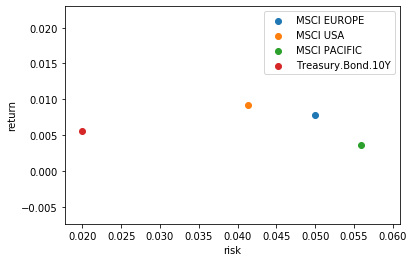

In [21]:
# return-risk ratio graph/
for asset in RiskyAsset:
    plt.scatter(x = indata[asset].std(), y = indata[asset].mean(), label = asset)
    plt.legend()

    
plt.xlabel("risk")
plt.ylabel("return")

#### <span> 8. Write up a paragraph comparing the statistics of the risky assets </span>

&nbsp;&nbsp;&nbsp;&nbsp; Comparing the return, MSCI USA has the highest return, while MSCI Pacific has the lowest return among the Risky Assets. Next, we can compare the risk of the four risky assets. MSCI Pacific has the has the highest risk, while Treasury Bond 10Y has a lowest risk with a great difference. With the lowest risk, Treasury Bond 10Y has the highest risk ratio. And, MSCI Pacific has the lowerst risk ratio with lowest return and with highest risk among the risky assets. 

 &nbsp;&nbsp;&nbsp;&nbsp; MSCI PACIFIC is the only asset with a positive skew, while the other three assets have negative skews. And, MSCI EUROPE has the highest kurtosis, while Treasury Bond 10Y has the lowest kurtosis, telling us it will have a lower or broader peak among the 4 risky assets. 


## <span style="color:black">Part 2:  Distributions </span>
Plot the distributions for each asset class and Compare the distribution

In [22]:
indata.head()

,Date,MSCI WORLD,MSCI AC WORLD,MSCI EUROPE,MSCI EM,MSCI EAFE,MSCI PACIFIC,MSCI USA,Treasury.Bond.10Y,Treasury.Bill.90D,Treasury.Bill.30D
0,1/29/1988,0.024592,0.025330,-0.040626,0.098380,0.018081,0.049747,0.042834,0.044235,0.005001,0.002762
1,2/29/1988,0.058224,0.058079,0.059266,0.003396,0.066914,0.070676,0.041869,0.013917,0.005349,0.004564
2,3/31/1988,0.030382,0.031100,0.027948,0.107385,0.061675,0.078041,-0.033456,-0.019930,0.004803,0.004402
3,4/29/1988,0.012798,0.012980,0.019014,0.053382,0.014717,0.012751,0.009184,-0.012511,0.004554,0.004577
4,5/31/1988,-0.019802,-0.019521,-0.018278,0.029962,-0.031833,-0.038039,0.008603,-0.015848,0.005027,0.005051


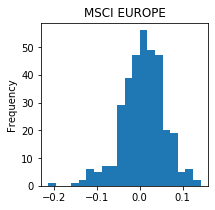

In [23]:
indata[RiskyAsset[0]].plot.hist(stacked=True, bins=20, title = RiskyAsset[0], figsize = (3, 3))

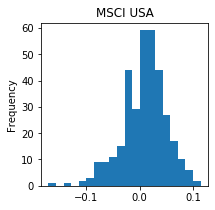

In [24]:
indata[RiskyAsset[1]].plot.hist(stacked=True, bins=20, title = RiskyAsset[1], figsize = (3, 3))

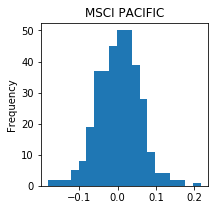

In [25]:
indata[RiskyAsset[2]].plot.hist(stacked=True, bins=20, title = RiskyAsset[2], figsize = (3, 3))

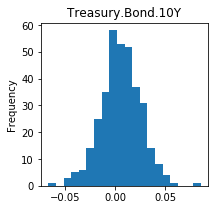

In [26]:
indata[RiskyAsset[3]].plot.hist(stacked=True, bins=20, title = RiskyAsset[3], figsize = (3, 3))

&nbsp;&nbsp;&nbsp;&nbsp; Comparing the spread of the distribution, the distribution of MSCI Europe has the largest spread. In constrast, the distribution of Treasury.Bond.10Y has the least spread among the 4 Risky Assets. The distributions of MSCI Pacific and Treasury Bond 10Y are symmetric among the 4 risky assets. While, the distributions of MSCI EUROPE and MSCI USA are skewed to the right. The center of the of MSCI EUROPE and MSCI USA is located above 0, while the center of MSCI Pacific and Treasury Bond 10Y is near 0. Again, the distributions of MSCI EUROPE and MSCI USA has a sharpest peak, while Treasury Bond 10Y and MSCI Pacific has a broader and not so sharp peak compared to the other two assests.



## <span style="color:black"> Part 3: Covariance and Correlation Matrices  </span>

 1.	Calculate the covariance matrix 
 2. Calculate the correlation matrix
 3.	Verify the covariance matrix is non-singular
 4.	Verify the covariance matrix is symmetric and positive definite


#### <span> 1.) covariance matrix </span>

In [27]:
cov = indata[RiskyAsset].cov()
cov

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
MSCI EUROPE,0.002500,0.001616,0.001813,-0.000097
MSCI USA,0.001616,0.001710,0.001247,-0.000039
MSCI PACIFIC,0.001813,0.001247,0.003131,-0.000035
Treasury.Bond.10Y,-0.000097,-0.000039,-0.000035,0.000395


#### <span> 2.) correlation matrix </span>

In [28]:
indata[RiskyAsset].corr()

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
MSCI EUROPE,1.000000,0.781742,0.647950,-0.097888
MSCI USA,0.781742,1.000000,0.538701,-0.047390
MSCI PACIFIC,0.647950,0.538701,1.000000,-0.031418
Treasury.Bond.10Y,-0.097888,-0.047390,-0.031418,1.000000


#### <span> 3.) Verify the covariance matrix is non-singular </span>

In [29]:
print("covariance matrix is non-singular: ", ((np.linalg.det(cov)))!=0)

covariance matrix is non-singular:  True


#### <span> 4.) Verify the covariance matrix is symmetric and positive definite </span>

In [30]:
print("covariance matrix is symmetric:" , (np.all(cov.transpose() == cov)))


print("covariance matrix is positive definite: ", (np.all(np.linalg.eigvals(cov) > 0)))

covariance matrix is symmetric: True
covariance matrix is positive definite:  True


## <span style="color:black">Part 4: Calculate the weights, returns and risks for the following portfolios     </span>
 1.	Minimum variance portfolio
 2. Portfolio with expected return of 9% and minimum variance
 3. Efficicent frontier (calculate the weights, returns and risk of at least 7 portfolios)
 4. Plot the portfolios and asset classes on a graph
 5. Plot an equal weighted portolio on the graph
 6. What is the expected return and risk of the minimum variance portfolio
  

In [31]:
Cov = np.array(indata[RiskyAsset].cov())
inverseCov = np.linalg.inv(Cov)
m = np.array(indata[RiskyAsset].mean())
u = np.array(Cov.shape[1] *[1] , float)

In [32]:
def get_risk (w):
    return np.sqrt(np.dot(np.dot(w , Cov) , w.T))

def get_return (w):
    return np.dot(w , m.transpose())


#### <span> 1. Minimum variance portfolio </span>

In [40]:
num = np.dot(np.linalg.inv(Cov), u)
den = np.dot(u, num)
minWeight = num / den

print("Minimum Variance Portfolio Weight: ", minWeight)


Minimum Variance Portfolio Weight:  [0.05030877 0.12979729 0.02500862 0.79488532]


#### <span> 2. Portfolio with expected return of 9% and minimum variance </span>

In [31]:
M = np.matrix([[np.dot(  np.dot( m , inverseCov ) , m.T ), 
                np.dot(  np.dot( u , inverseCov ) , m.T )], 
               [np.dot(  np.dot( m , inverseCov ) , u.T ), 
                np.dot(  np.dot( u , inverseCov ) , u.T )]], 
              dtype = 'float')

inverseM = np.linalg.inv(M)


# find lambda
lambda_matrix = 2 * np.dot(inverseM, np.matrix([0.09, 1]).T)

# find weight
exp9_weight = (lambda_matrix[0] * np.dot(m, inverseCov) +lambda_matrix[1] *  np.dot(u, inverseCov))
exp9_weight = (1/2) * exp9_weight 

#find Risk
exp9_Risk = get_risk(exp9_weight)



print("Weight: ", exp9_weight)
print("Risk: ", float(exp9_Risk))


Weight:  [[  0.66036403  16.99526494 -11.37623988  -5.27938909]]
Risk:  0.6647102404736523


#### <span> 3. Efficicent frontier (calculate the weights, returns and risk of at least 7 portfolios) </span>

In [54]:
return_mvl = []
risk_mvl = []
#returns = 0.01

stdevs = np.sqrt(np.diag(Cov))

returns = 0.006143974980755603 -0.004 
M = np.matrix([[np.dot(  np.dot( m , inverseCov ) , m.T ), 
                np.dot(  np.dot( u , inverseCov ) , m.T )], 
               [np.dot(  np.dot( m , inverseCov ) , u.T ), 
                np.dot(  np.dot( u , inverseCov ) , u.T )]], dtype = 'float')

for i in range (7):
    
    lambda_matrix = 2 * np.dot(np.linalg.inv(M), np.matrix([returns, 1]).T)

    Weight_mvl = lambda_matrix[0] * np.dot(m, inverseCov) +lambda_matrix[1] *  np.dot(u, inverseCov)
    Weight_mvl = Weight_mvl/2
    
    return_mvl.append(returns)

    Risk_mvl = get_risk(Weight_mvl)
    risk_mvl.append(float(Risk_mvl))
    
    print("Portfolio",i + 1,":" )
    print("Weight:",(Weight_mvl))
    print("Return: " ,float(returns))
    print("Risk: " ,float(Risk_mvl))
    print("\n") 
    
    returns += 0.002


Portfolio 1 :
Weight: [[ 0.02120864 -0.67469911  0.56885736  1.08463311]]
Return:  0.0021439749807556033
Risk:  0.03616885833299311


Portfolio 2 :
Weight: [[ 0.0357587  -0.27245091  0.29693299  0.93975922]]
Return:  0.004143974980755603
Risk:  0.023551936466346315


Portfolio 3 :
Weight: [[0.05030877 0.12979729 0.02500862 0.79488532]]
Return:  0.006143974980755603
Risk:  0.017422098344221055


Portfolio 4 :
Weight: [[ 0.06485883  0.53204549 -0.24691576  0.65001143]]
Return:  0.008143974980755603
Risk:  0.023551936466346308


Portfolio 5 :
Weight: [[ 0.0794089   0.9342937  -0.51884013  0.50513754]]
Return:  0.010143974980755604
Risk:  0.03616885833299309


Portfolio 6 :
Weight: [[ 0.09395896  1.3365419  -0.7907645   0.36026364]]
Return:  0.012143974980755604
Risk:  0.05063602784685667


Portfolio 7 :
Weight: [[ 0.10850902  1.7387901  -1.06268887  0.21538975]]
Return:  0.014143974980755604
Risk:  0.06574311158061633




#### <span> 4. Plot the portfolios and asset classes on a graph </span>

Text(0, 0.5, 'Return')

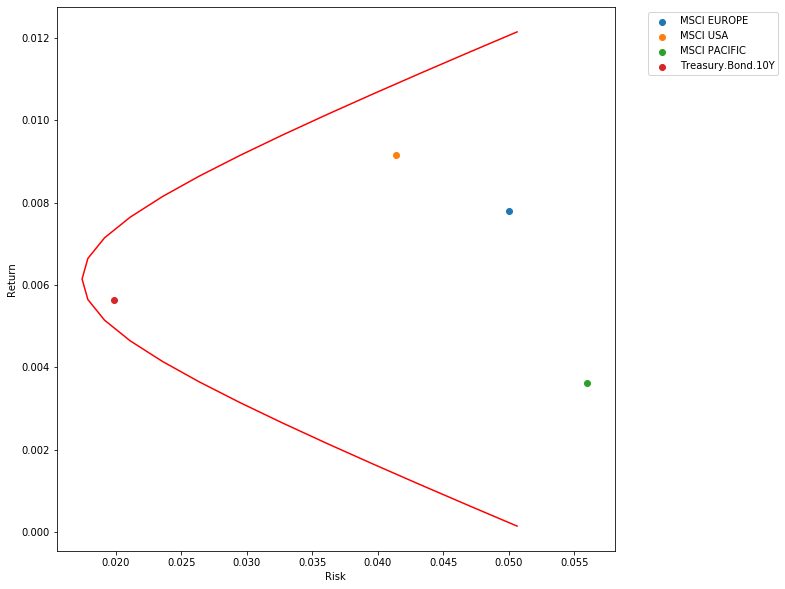

In [74]:
return_mvl = []
risk_mvl = []
#returns = 0.01

stdevs = np.sqrt(np.diag(Cov))

returns = 0.006143974980755603 -0.006 

for i in range (25):
    
    lambda_matrix = 2 * np.dot(np.linalg.inv(M), np.matrix([returns, 1]).T)

    Weight_mvl = lambda_matrix[0] * np.dot(m, inverseCov) +lambda_matrix[1] *  np.dot(u, inverseCov)
    Weight_mvl = Weight_mvl/2
    
    return_mvl.append(returns)

    Risk_mvl = get_risk(Weight_mvl)
    risk_mvl.append(float(Risk_mvl))

    
    returns += 0.0005





plt.figure(figsize=(10, 10))

plt.plot(risk_mvl, return_mvl , c = 'Red')


for i in range(4):
    plt.scatter(x = stdevs[i], y = m[i], label = RiskyAsset[i])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    i += 1


plt.xlabel("Risk")
plt.ylabel("Return")

#### <span> 5. Plot an equal weighted portolio on the graph </span>

Weights:  [0.25, 0.25, 0.25, 0.25]
Equal Return:  0.006547158190373563
Equal Risk: 0.03235144184029226


Text(0, 0.5, 'Return')

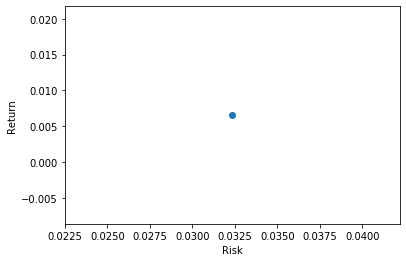

In [35]:
equal_weights = [1/len(RiskyAsset) for i in range (len(RiskyAsset))]


equal_return = np.dot(equal_weights, m.T)
equal_risk = np.sqrt(np.dot(np.dot(equal_weights, Cov), equal_weights ))
print("Weights: ",equal_weights)
print("Equal Return: ", equal_return)
print("Equal Risk:", equal_risk)



plt.scatter(x = equal_risk, y = equal_return)
plt.xlabel("Risk")
plt.ylabel("Return")


#### <span> 6. What is the expected return and risk of the minimum variance portfolio </span>

In [44]:
minReturn = get_return(minWeight)
print("Expected Return of minimum variance portfolio is", minReturn)

Expected Return of minimum variance portfolio is 0.006143974980755603


In [45]:
minRisk = get_risk(minWeight)
print("Expected Return of minimum variance portfolio is", minRisk)


Expected Return of minimum variance portfolio is 0.01742209834422105


## <span style="color:black">Part 5: Calculate the beta (t-stat, R-square) of each the risk asset class to the following 2 'market' portfolios   </span>

  Market Portfolio 1: "MSCI AC WORLD"    
  Market Portfolio 2: "MSCI USA"
  
  Compare the betas for each asset class


In [56]:
# Comparing with Market Portfolio 1: "MSCI AC WORLD"

print("Part 1")
for asset in RiskyAsset:
    result1 = sm.OLS (indata[asset], indata["MSCI AC WORLD"]).fit()
    print(asset)
    print(result1.summary())
    print("\n")

print("Part 2")
for asset in RiskyAsset:
    result1 = sm.OLS (indata[asset], indata["MSCI USA"]).fit()
    print(asset)
    print(result1.summary())
    print("\n")



Part 1
MSCI EUROPE
                                 OLS Regression Results                                
Dep. Variable:            MSCI EUROPE   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              1859.
Date:                Sun, 08 Nov 2020   Prob (F-statistic):                   2.00e-141
Time:                        06:48:51   Log-Likelihood:                          866.89
No. Observations:                 348   AIC:                                     -1732.
Df Residuals:                     347   BIC:                                     -1728.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------

Comparing with Market Portfolio 1: "MSCI AC WORLD", MSCI EUROPE AND MSCI PACIFIC has betas that are near 1, which tells us risk is somewhat similar to MSCI AC WORLD, which is the market portfolio that is being compared to. And, MSCI USA has a beta greater than 0 but less than 1, telling us it is less riskier than MSCI AC WORLD. In addition, Treasury Bond 10Y has a negative beta, which tells us that Treasury Bond moves in a opposite direction compared to the Market Portfolio.

Comparing with Market Portfolio 2: "MSCI USA", MSCI EUROPE, MSCI PACIFIC, and Treasury Bond 10Y has a beta between 0 and 1. But, MSCI EUROPE has a beta near 1, telling us risk is somewhat similar to the market porfolio that we are comparing to. And, Treasury Bond 10Y has a beta near 0, which mean that the Bond is uncorrelated with the market portfolio. MSCI USA has a beta of 1 as it is compared with itself.  

## <span style="color:black">Part 6: Advanced Portfolio Optimization </span>

Exponentially Weighted Moving Average Covariance Matrix
An exponentially weighted moving average (EWMA) puts more weight on the more recent observations, and thus takes some account of the dynamic ordering in returns.  When an EWMA is applied to squared returns the resulting volatility estimate will react immediately following an unusually large return.  Then the effect of this return in the EWMA gradually diminishes over time.  The reaction of EWMA volatility estimates to market events therefore persist over time, and with a strength determined by the smoothing constant \lambda.  This is a number between 0 and 1.  The larger the value of \lambda the more weight is placed on past observations and so the smoother the series becomes.  (Alexander, 2001)

Look up how to calculate a covariance matrix using EWMA
Calculate the 4 minimum variance portfolio with this matrix using 4 different \lambdas.  Compare the weights for these 4 different \lambdas and the equal weighted (normal covariance matrix from Part 3)


In [46]:

def ewma_mvp (lambdas):
    
    covariance = indata[RiskyAsset].ewm( alpha = lambdas).mean().cov()

    inv_covariance = np.linalg.inv(covariance)
    print("covariance lambda: \n")
    print(covariance)
    
    num = np.dot(u, inv_covariance)
    den = np.dot(num, u.T)
    weight_mvp = num/den
    
    print("weight: ",weight_mvp)
    risk_mvp = get_risk(weight_mvp)
    print("risk: ",risk_mvp)
    return_mvp = get_return(weight_mvp)
    print("return: ",return_mvp)
 



print("covariance: \n")
print(cov)

print("Weights: ",minWeight)
print("Return: ", minReturn)
print("Risk:", minRisk)
print("\n")

lambda1 = 0.10
print("minimum variance portfolio 1:")
ewma_mvp1 = ewma_mvp(lambda1)
print("\n")

print("minimum variance portfolio 2:")
lambda2 = 0.5
ewma_mvp1 = ewma_mvp(lambda2)
print("\n")

print("minimum variance portfolio 3:")
lambda3 = 0.75
ewma_mvp1 = ewma_mvp(lambda3)
print("\n")

print("minimum variance portfolio 4:")
lambda4 = 1
ewma_mvp1 = ewma_mvp(lambda4)
print("\n")


covariance: 

                   MSCI EUROPE  MSCI USA  MSCI PACIFIC  Treasury.Bond.10Y
MSCI EUROPE           0.002500  0.001616      0.001813          -0.000097
MSCI USA              0.001616  0.001710      0.001247          -0.000039
MSCI PACIFIC          0.001813  0.001247      0.003131          -0.000035
Treasury.Bond.10Y    -0.000097 -0.000039     -0.000035           0.000395
Weights:  [0.05030877 0.12979729 0.02500862 0.79488532]
Return:  0.006143974980755603
Risk: 0.01742209834422105


minimum variance portfolio 1:
covariance lambda: 

                   MSCI EUROPE  MSCI USA  MSCI PACIFIC  Treasury.Bond.10Y
MSCI EUROPE           0.000151  0.000105      0.000087          -0.000015
MSCI USA              0.000105  0.000125      0.000077           0.000001
MSCI PACIFIC          0.000087  0.000077      0.000210          -0.000012
Treasury.Bond.10Y    -0.000015  0.000001     -0.000012           0.000022
weight:  [ 0.23066853 -0.13714408  0.0685174   0.83795815]
risk:  0.0188807299558

The standard deviations from covariance matrix with different lambdas were mostly smaller than the standard deviation from normal covariance matrix except for the covariance matrix when lambda was equal to 1. Risks were also higher for 3 the different lambdas than risk calculated with normal covariance matrix except for when lambda was equal to 1. But, returns were lower for the 3 different lambdas except for when lambda was equal to 1. 